In [222]:
%pwd

'C:\\Users\\Baron\\Desktop\\EE_257_Repo\\EE_257\\%ML_PATH_EE257%\\EE257_env\\Assignments\\Hw3'

In [223]:
# Libararies Associated 
# %load ../standard_import.txt

import pandas as pd # Library associated with machine learning functions
import numpy as np # NumPy is the fundamental package for scientific computing in Python 

%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt

import seaborn as sns

# Classification Models:

# Linear Models
import sklearn.linear_model as skl_lm # Linear Model

#LDA and QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#Logistical Regression
from sklearn.linear_model import LogisticRegression

# Libraries for the Confusion Matrix, Classification report and the precision score
from sklearn.metrics import confusion_matrix, classification_report, precision_score



#Processing? Neighbors for KNN
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score


# Stats models
import statsmodels.api as sm
import statsmodels.formula.api as smf

import random

In [224]:
# Understanding the dataset Using Summary Statistics: TEST

import pandas as pd 
dataframe_TEST  = pd.read_csv("emnist-letters-test.csv", header = None)
dataframe_TRAIN = pd.read_csv("emnist-letters-train.csv", header = None)

dataframe_TEST.head(14000)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13996,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13997,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13998,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
#Summary Statistics for Test
dataframe_TEST.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,14800.000000,14800.0,14800.0,14800.0,14800.0,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,...,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0
mean,9.756757,0.0,0.0,0.0,0.0,0.000878,0.024122,0.044662,0.018716,0.020676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,5.344566,0.0,0.0,0.0,0.0,0.106859,1.413554,2.611465,1.100400,1.238657,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,5.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,10.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,14.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,19.000000,0.0,0.0,0.0,0.0,13.000000,108.000000,208.000000,106.000000,126.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [226]:
# Understanding the dataset Using Summary Statistics: TRAIN
dataframe_TRAIN.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
dataframe_TRAIN.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,88800.000000,88800.0,88800.0,88800.0,88800.000000,88800.000000,88800.000000,88800.000000,88800.000000,88800.000000,...,88800.0,88800.0,88800.0,88800.000000,88800.000000,88800.0,88800.0,88800.0,88800.0,88800.0
mean,13.519268,0.0,0.0,0.0,0.000011,0.003986,0.016757,0.024640,0.021486,0.017140,...,0.0,0.0,0.0,0.003041,0.000360,0.0,0.0,0.0,0.0,0.0
std,7.502931,0.0,0.0,0.0,0.003356,0.544039,1.547686,1.915976,1.803270,1.620194,...,0.0,0.0,0.0,0.823445,0.107385,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,7.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,14.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,20.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,26.000000,0.0,0.0,0.0,1.000000,107.000000,213.000000,217.000000,214.000000,216.000000,...,0.0,0.0,0.0,244.000000,32.000000,0.0,0.0,0.0,0.0,0.0


In [228]:
#1. Use shape function to understand the range of the datasets

# Training Data
print(dataframe_TRAIN.shape)
# Test Data
print(dataframe_TEST.shape)
#Extra Column denoted by the rows

(88800, 785)
(14800, 785)


In [229]:
#Assigning the X and Y (inputs and outputs)

#  **TEST** using iloc and loc
image = dataframe_TRAIN.loc[:,1:785]


In [230]:
# Isolate the first column (Labels for alphabet)
# Assert Input Column
y_train = np.array(dataframe_TRAIN.iloc[:,0].values)
# Assert Output Array
x_train = np.array(dataframe_TRAIN.iloc[:,1:].values)

# Assert Input Column
y_test = np.array(dataframe_TEST.iloc[:,0].values)
# Assert Output Array
x_test = np.array(dataframe_TEST.iloc[:,1:].values)


# Assert the data
image = dataframe_TRAIN.loc[:,1:785]
image_in = image.loc[1,:]
image_proc = image_in.values.reshape(28,28)

[m, n] = x_train.shape

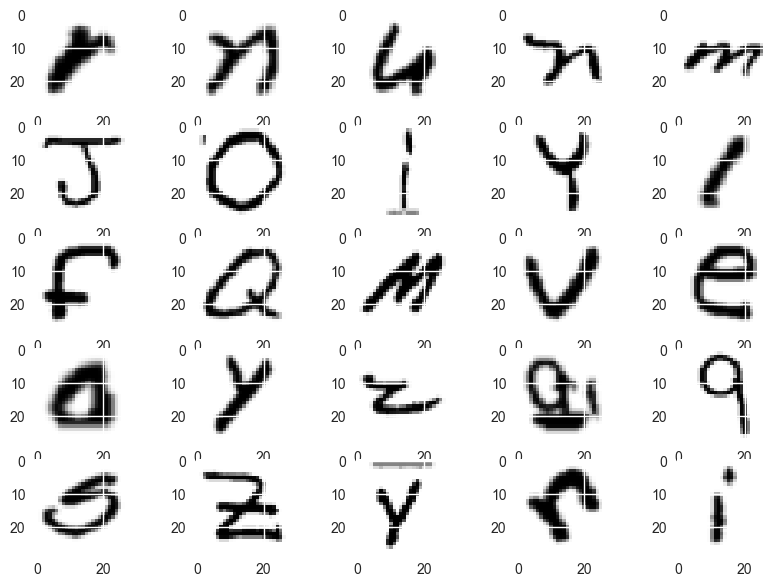

In [231]:
#Analyze the data in graphical form

fig,axes = plt.subplots(5,5,figsize=(10,7))

for i,ax in enumerate(axes.flat):
    ax.imshow(x_train[random.randrange(0,m)].reshape(28,28, order = 'F'), plt.cm.binary)

In [232]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

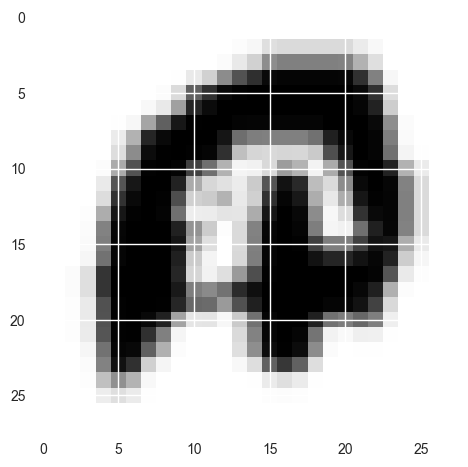

In [233]:
#Plot only one letter
%matplotlib inline
plt.imshow(image_proc, cmap = matplotlib.cm.binary,interpolation="nearest")



In [234]:
# Part D
# KNN (Test)

y_test_a = (y_test == 1)
y_train_a = (y_train == 1)

output = KNeighborsClassifier(n_neighbors=6)

output.fit(x_test,y_test_a)

KNeighborsClassifier(n_neighbors=6)

In [235]:
# KNN Test Data
prediction = output.predict(x_test)
print(prediction)
print(classification_report(y_test_a,prediction, target_names = ['not a','a'], digits = 4))

[ True  True  True ... False False False]
              precision    recall  f1-score   support

       not a     0.9825    0.9975    0.9899     14000
           a     0.9403    0.6887    0.7951       800

    accuracy                         0.9808     14800
   macro avg     0.9614    0.8431    0.8925     14800
weighted avg     0.9802    0.9808    0.9794     14800



In [236]:
#LDA (Test)
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(x_test,y_test_a)


LinearDiscriminantAnalysis()

In [237]:
#Assign the prediction
LDA_predicition = lda_clf.predict(x_test)
print(LDA_predicition)

[False False False ... False False False]


In [238]:
print(classification_report(y_test_a,LDA_predicition, target_names = ['not a','a'], digits = 4))

              precision    recall  f1-score   support

       not a     0.9702    0.9828    0.9764     14000
           a     0.6100    0.4713    0.5317       800

    accuracy                         0.9551     14800
   macro avg     0.7901    0.7270    0.7541     14800
weighted avg     0.9507    0.9551    0.9524     14800



In [239]:
#QDA (Test)
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(x_test,y_test_a)
qda_prediction = qda_clf.predict(x_test)

C:\Users\Baron\Desktop\EE_257_Repo\EE_257\%ML_PATH_EE257%\EE257_env\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [240]:
qda_prediction = qda_clf.predict(x_test)
print(qda_prediction)

[ True False  True ... False False False]


In [241]:
print(classification_report(y_test_a,qda_prediction, target_names = ['not','a'], digits = 4))


              precision    recall  f1-score   support

         not     0.9998    0.8791    0.9355     14000
           a     0.3201    0.9962    0.4845       800

    accuracy                         0.8854     14800
   macro avg     0.6599    0.9377    0.7100     14800
weighted avg     0.9630    0.8854    0.9112     14800



In [242]:
# Logistical Regression (Test)

In [243]:
# Logistical Regression (Test)
clf = skl_lm.LogisticRegression(solver='newton-cg')

#fit the output
clf.fit(x_test,y_test_a) 
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)


classes:  [False  True]
coefficients:  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.47311107e-04 -4.88433743e-04 -1.28473658e-03 -1.16070942e-03
  -2.00611089e-04 -2.20892943e-04 -1.06996842e-04 -1.16839562e-04
  -1.24518994e-04  0.00000000e+00 -9.48904596e-03 -6.35521234e-03
  -4.69908204e-04 -4.57837485e-04 -3.43855172e-04 -1.92592811e-06
  -5.22600485e-07  0.00000000e+00 -2.24981952e-02 -6.61711623e-04
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.50916881e-04 -1.20875709e-03
  -1.66992045e-02 -1.07989834e-01 -5.56946899e-02 -1.15315908e-01
  -1.27725776e-01 -2.00427681e-02 -3.51618607e-02 -1.31757146e-02
  -1.25015710e-02  9.00701268e-03  7.06054497e-02  3.95267930e-02
  -1.16624659e-02 -1.54245502e-02 -2.28077110e-02 -1.55903727e-02
  -5.27618917e-02  4.64098346e-02  2.84735187e-02 -5.98287501e-03
   1.05553874e-01 -5.66647734e-02  6.26825473e-02  0.00000000e+00
   0.00000000e+00 -3.92523845e-05 -5.

C:\Users\Baron\Desktop\EE_257_Repo\EE_257\%ML_PATH_EE257%\EE257_env\Lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [244]:
logistical_prediction = clf.predict(x_test)
print(logistical_prediction)
print(classification_report(y_test_a,logistical_prediction, target_names = ['not a','a'], digits = 4))

[False False  True ... False False False]
              precision    recall  f1-score   support

       not a     0.9715    0.9909    0.9811     14000
           a     0.7543    0.4913    0.5950       800

    accuracy                         0.9639     14800
   macro avg     0.8629    0.7411    0.7880     14800
weighted avg     0.9598    0.9639    0.9602     14800

